In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read_csv converts to DataFrame
applied = pd.read_csv('../Data/assylum/assylum_applications_raw.csv')
accepted = pd.read_csv('../Data/assylum/assylum_applications_accepted_raw.csv')

In [22]:
applied.rename(columns={'OBS_VALUE': 'count_applied'}, errors='raise', inplace = True)
accepted.rename(columns={'OBS_VALUE' : 'count_accepted'}, inplace = True)

398 397
Countries to choose from: {'Portugal', 'Denmark', 'Croatia', 'Montenegro', 'Sweden', 'Hungary', 'Greece', 'Netherlands', 'Latvia', 'Czechia', 'Iceland', 'Norway', 'Poland', 'Belgium', 'European Union - 27 countries (from 2020)', 'Spain', 'United Kingdom', 'Malta', 'Germany', 'Bulgaria', 'Cyprus', 'Ireland', 'Luxembourg', 'Italy', 'Slovenia', 'Switzerland', 'Estonia', 'France', 'Finland', 'Slovakia', 'Liechtenstein', 'Lithuania', 'Austria', 'Romania'}


,count_applied,count_accepted,year
country,,,
European Union - 27 countries (from 2020),8717385,262465,22198
Germany,3281775,121380,24222
France,1374205,82375,24222
Italy,989580,6320,24222
Spain,849430,295,24222
Greece,529055,7330,24222
Sweden,504455,10485,24222
Austria,478265,30640,24222
Belgium,328105,5090,24222


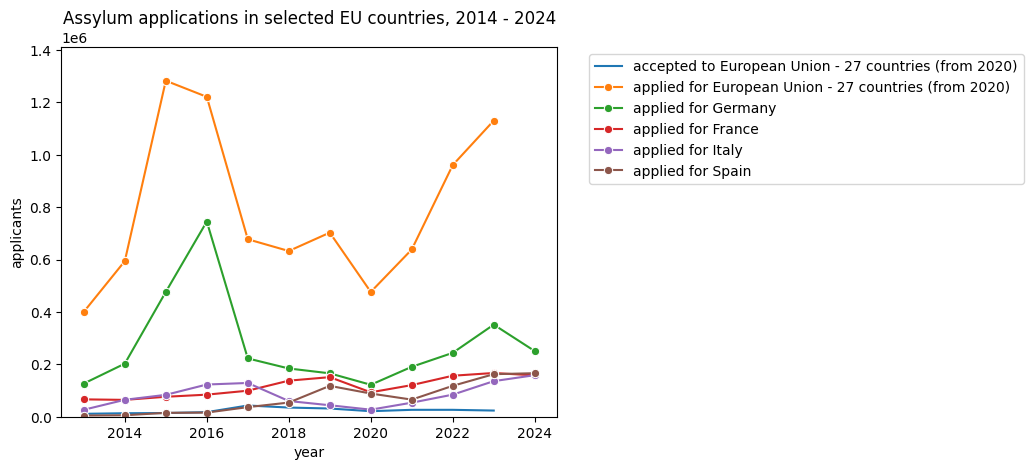

In [23]:

print(len(applied), len(accepted))
# applied is longer by one row, so we need to merge both dataframes
joined = pd.merge(applied, accepted, on = ['TIME_PERIOD', 'geo',], how = 'inner')

# we only need a few of the columns:
assylum_table = pd.DataFrame({'count_applied' : joined['count_applied'], 
                              'count_accepted' : joined['count_accepted'],
                              'country': joined['geo'], 
                              'year': joined['TIME_PERIOD'] })

# display(assylum_table)
# display(accepted)
# display(applied)

def draw_asyllum(name, applied = True, accepted=False):
    a_country = assylum_table.query("country == @name").set_index('year')

    if applied:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_applied', label = f'applied for {name}', marker= 'o')
    if accepted:
        a = sns.lineplot(data = a_country, x = 'year', y = 'count_accepted', label = f'accepted to {name}')

    a.set_title(f'Assylum applications in selected EU countries, 2014 - 2024')
    if applied:
        upper_y = 1.1 * assylum_table['count_applied'].max()
    else:
        upper_y = 1.1 * assylum_table['count_accepted'].max()

    a.set_ylim(ymin= 0, ymax = upper_y )
    a.set_ylabel('applicants')
    a.legend(bbox_to_anchor=(1.05, 1), loc=2)

print('Countries to choose from:', set(assylum_table['country']))


# Plot the top 5 countries with the most applications:
top = assylum_table.groupby(by = 'country').sum().sort_values(by = 'count_applied', ascending=False)
display(top)
g = draw_asyllum(top.index[0], applied = False, accepted=True)
for country in top.index[0:5]:
    g = draw_asyllum(country)

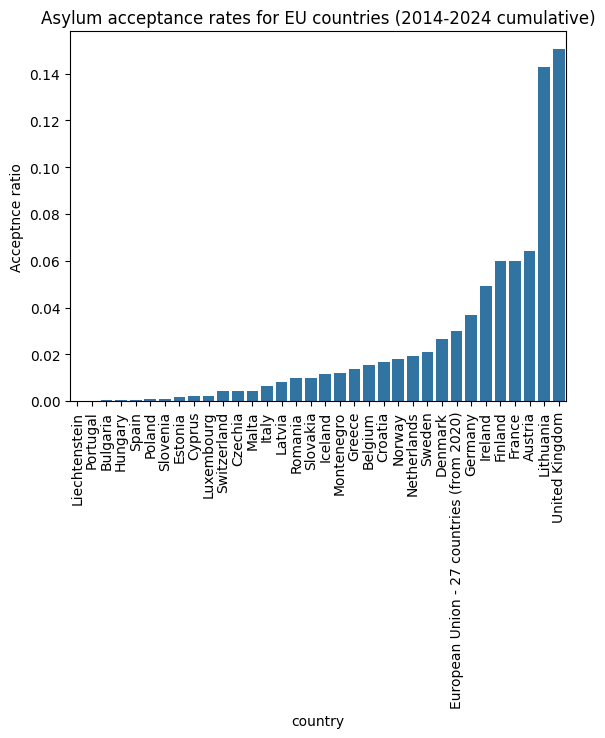

In [24]:

# which country is the most generous? not so easy to tell...
# -> compute ratios of acceptance for each country and plot as bar plot
top['b_ratio'] = top['count_accepted'] / top['count_applied']
top.sort_values(by = 'b_ratio', inplace = True)

a = sns.barplot(data = top, x = 'country', y = 'b_ratio')
a.set_ylabel('Acceptnce ratio')
a.set_title('Asylum acceptance rates for EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
pass

In [25]:
populations = pd.read_csv('../Data/population.csv')
pop_2020 = populations.query("TIME_PERIOD == 2020")
selected_countries = set(top.index) 
total_pop = pop_2020.query("geo in @selected_countries")

# display(pop_2020)
# display(total_pop)
# checking if no country is missing:
k = set(total_pop['geo'])
print(selected_countries - k,  k - selected_countries)    
print(len(total_pop), len(top))

total_pop.sort_values('geo', ascending=True, inplace = True)
top.sort_index(ascending=True, inplace=True)

# finally add column to "top" dataframe  # to_numpy creates a clean array without index.
top['population'] = total_pop['OBS_VALUE'].to_numpy()
top.drop(columns = 'year', inplace = True)
display(top)

set() set()
34 34


C:\Users\adize\AppData\Local\Temp\ipykernel_30928\2352488579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_pop.sort_values('geo', ascending=True, inplace = True)


,count_applied,count_accepted,b_ratio,population
country,,,,
Austria,478265,30640,0.064065,8901064
Belgium,328105,5090,0.015513,11522440
Bulgaria,136100,35,0.000257,6569275
Croatia,16890,285,0.016874,3933511
Cyprus,98670,200,0.002027,888005
Czechia,16890,75,0.004440,10693939
Denmark,71310,1905,0.026714,5822763
Estonia,9460,15,0.001586,1328976
European Union - 27 countries (from 2020),8717385,262465,0.030108,447015600


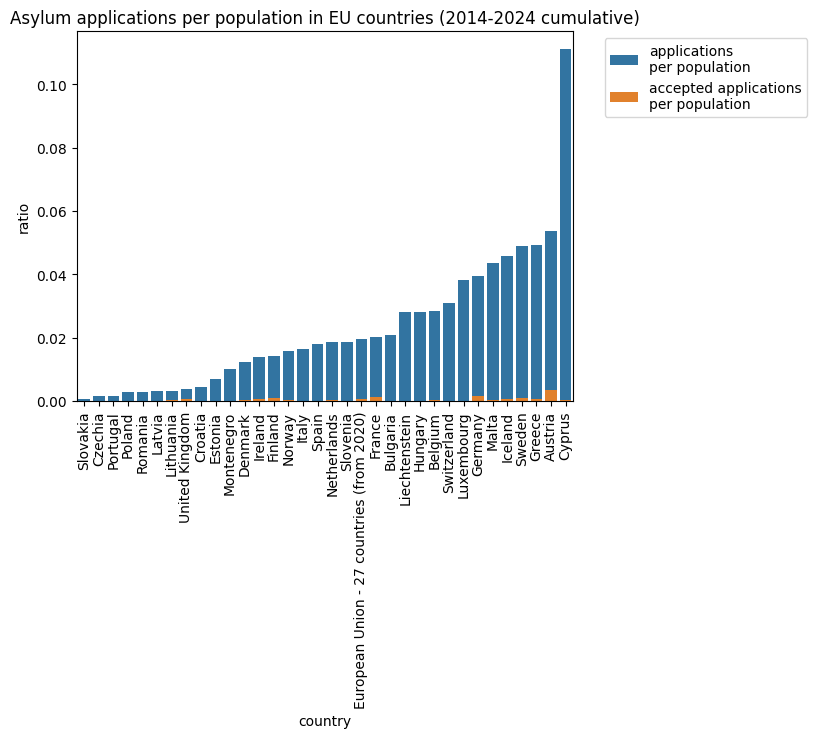

In [26]:
# just a simple bar plot:
top['app_ratio'] = top['count_applied'] / top['population']
top['acc_ratio'] = top['count_accepted'] / top['population']
top.sort_values(by = 'app_ratio', inplace = True)
p = sns.barplot(data = top, x = 'country', y = 'app_ratio', label = 'applications\nper population')
p = sns.barplot(data = top, x = 'country', y = 'acc_ratio', label = 'accepted applications\nper population')
p.set_ylabel('ratio')
p.set_title('Asylum applications per population in EU countries (2014-2024 cumulative)')
plt.xticks(rotation = 90)
p.legend(bbox_to_anchor=(1.05, 1), loc=2)
pass